# Principal Component Analysis

## Task 1: Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\SHREYAS\Desktop\wine.csv")

In [2]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
## there are no missing values

In [8]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

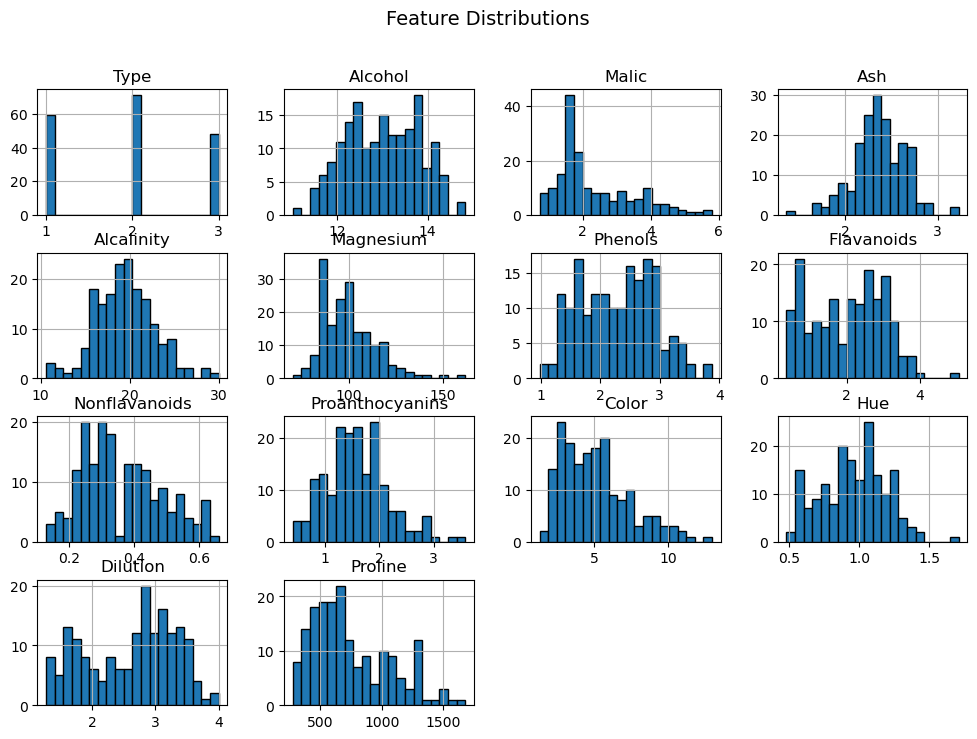

In [14]:
# hist plot

df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

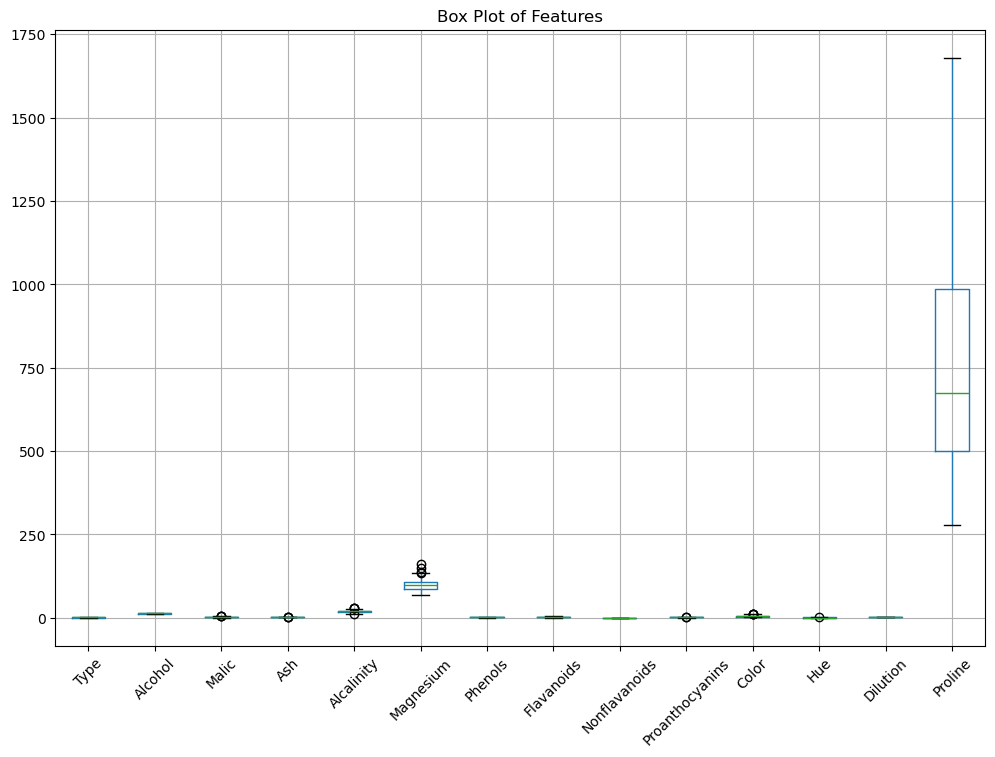

In [15]:
# Box plot

plt.figure(figsize=(12, 8))
df.boxplot(rot=45) 
plt.title("Box Plot of Features")
plt.show()

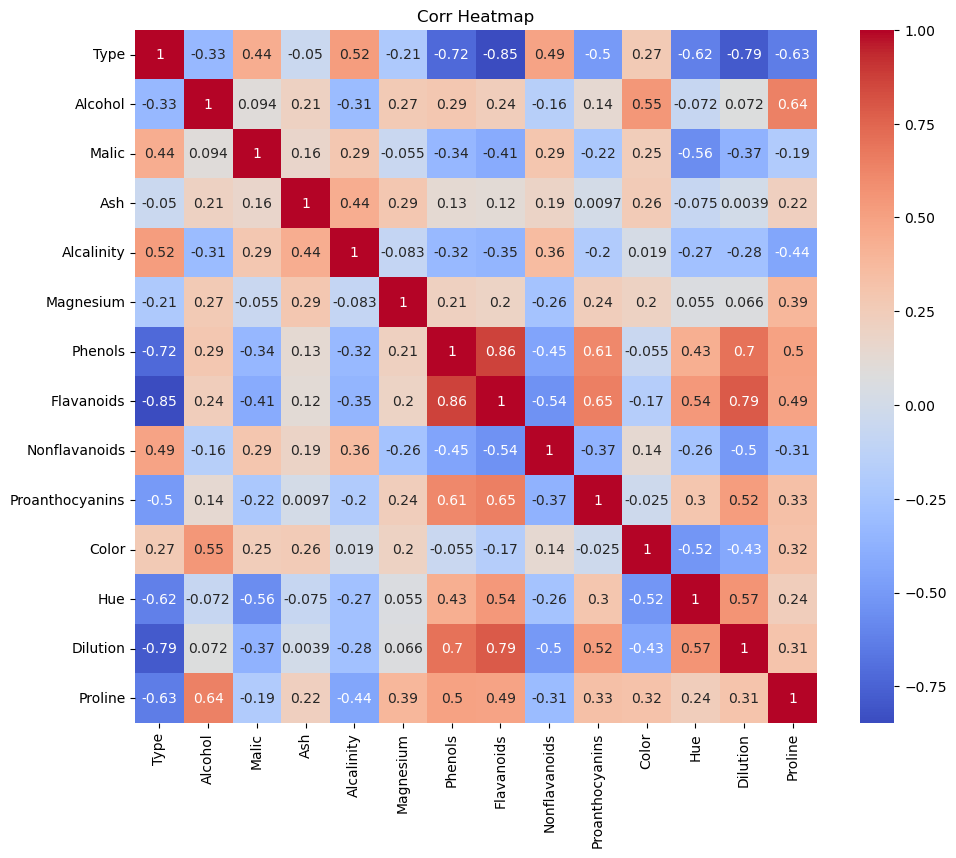

In [24]:
z =df.corr(numeric_only=True)

plt.figure(figsize=(11,9))
sns.heatmap(z, annot=True, cmap="coolwarm")
plt.title("Corr Heatmap")
plt.show()

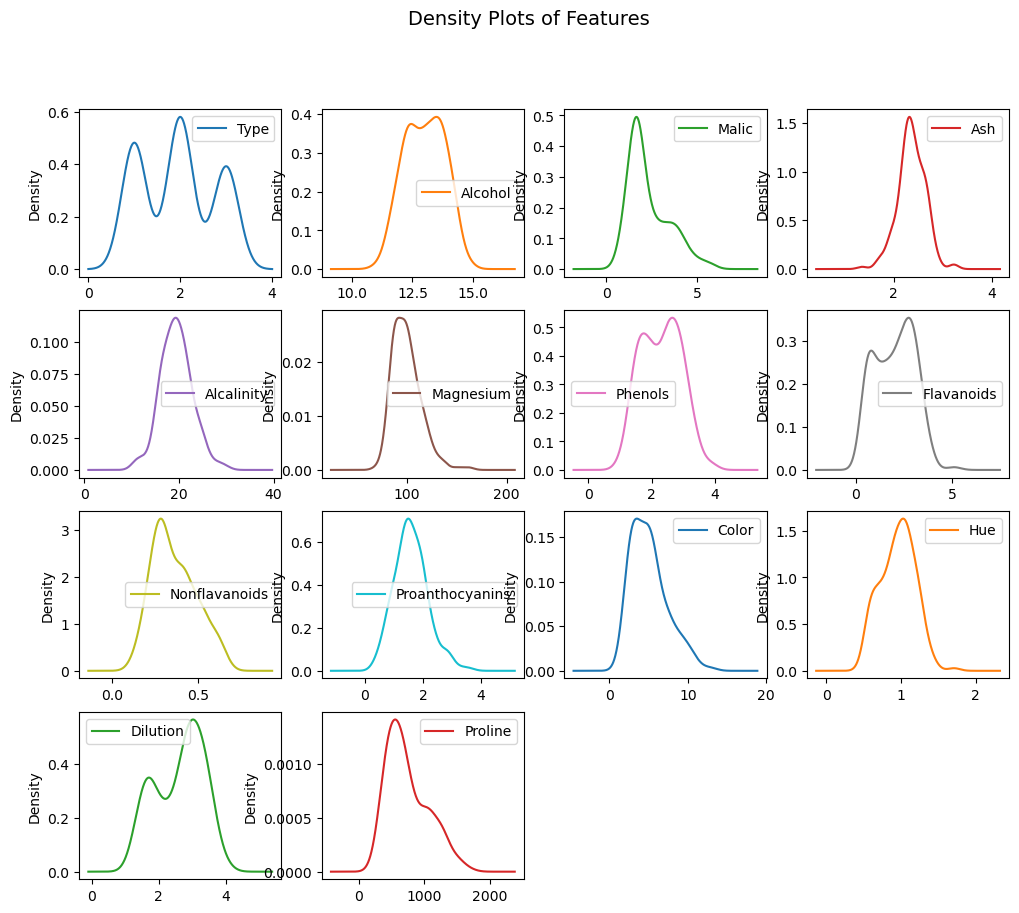

In [23]:
# Density Plots

df.plot(kind="density", subplots=True, layout=(4, 4), figsize=(12, 10), sharex=False)
plt.suptitle("Density Plots of Features", fontsize=14)
plt.show()

## Task 2: Dimensionality Reduction with PCA:

In [25]:
# Standardizing the Data for PCA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)


In [26]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)

PCA()

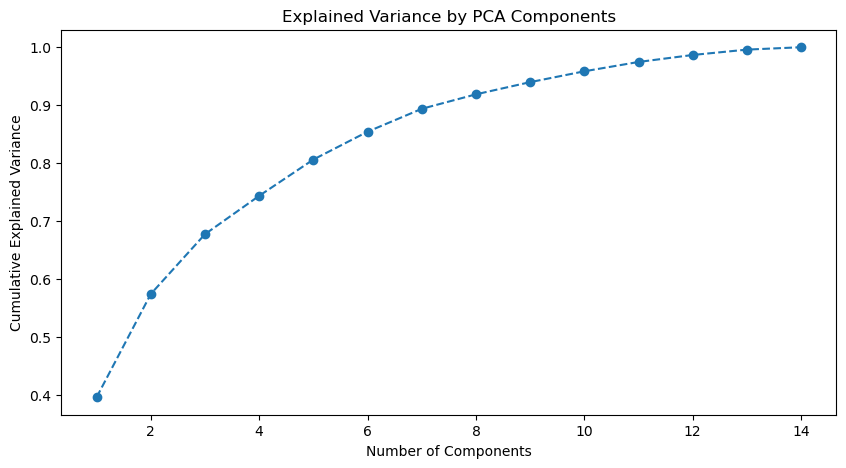

In [28]:
# Explained variance plot

import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(df.columns) + 1), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

## Task 3: Clustering with Original Data:

In [29]:
# 95% variance

optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1  
print(f"Optimal number of components: {optimal_components}")

# Apply PCA with the optimal number of components

pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(scaled_data)


Optimal number of components: 10


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [34]:
# Applying K-Means clustering

kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(scaled_data)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
# Evaluate clustering performance

silhouette_original = silhouette_score(scaled_data, clusters_original)
davies_bouldin_original = davies_bouldin_score(scaled_data, clusters_original)
print(f"Silhouette Score (Original): {silhouette_original}")
print(f"Davies-Bouldin Index (Original): {davies_bouldin_original}")

Silhouette Score (Original): 0.30648398324833453
Davies-Bouldin Index (Original): 1.315707552261773


## Task 4: Clustering with PCA Data:

In [36]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
# Evaluating clustering performance

silhouette_pca = silhouette_score(pca_data, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data, clusters_pca)
print(f"Silhouette Score (PCA-Reduced): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA-Reduced): {davies_bouldin_pca}")

Silhouette Score (PCA-Reduced): 0.32292055407233006
Davies-Bouldin Index (PCA-Reduced): 1.2578453408449175


## Task 5: Comparison and Analysis:

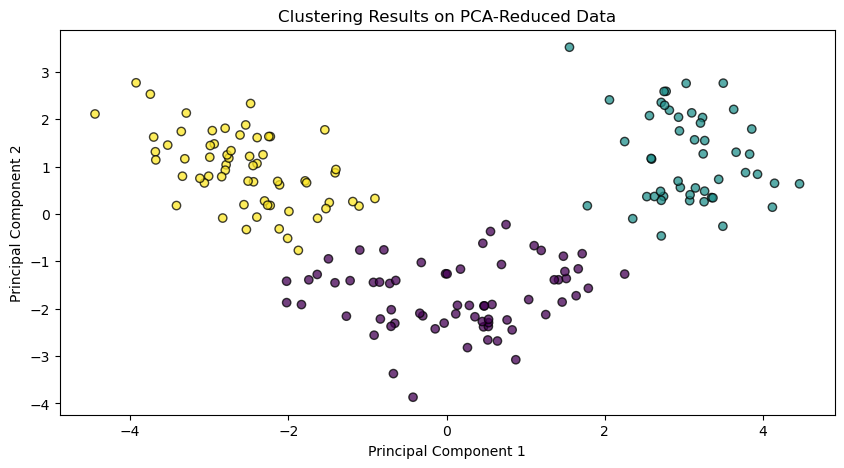

In [38]:
plt.figure(figsize=(10, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca, cmap="viridis", edgecolors="k", alpha=0.75)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering Results on PCA-Reduced Data")
plt.show()

## Task 6: Conclusion and Insights

- Compare clustering results before and after PCA.

- PCA helps in reducing dimensionality while preserving essential information.

- Clustering on PCA-transformed data may improve or worsen depending on data characteristics.

- If PCA improves the silhouette score and reduces the Davies-Bouldin index, it's beneficial.